In [2]:
import os
import re
import ast
import json
import shutil
import platform
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

tqdm.pandas()
if platform.node() == 'Nick_Laptop':
    drive = 'C'
elif platform.node() == 'MSI':
    drive = 'D'
else:
    drive = 'uhhhhhh'
    print('Uhhhhhhhhhhhhh')
os.chdir(f'{drive}:/PhD/DissolutionProgramming/LND---Land-Paper')

PROCESSED = 'Data/Processed'
RAW = 'Data/Raw'
SURNAMES = f'{PROCESSED}/surname_info'
TABLES = 'Output/Tables'
IMAGES = 'Output/Images'

C:\Users\nicho\AppData\Local\Temp\ipykernel_17560\492934797.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='Estimate', y='year', ci=None, markers='o', color='blue', linestyle=None, join=False)
C:\Users\nicho\AppData\Local\Temp\ipykernel_17560\492934797.py:27: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Estimate', y='year', ci=None, markers='o', color='blue', linestyle=None, join=False)
C:\Users\nicho\AppData\Local\Temp\ipykernel_17560\492934797.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df, x='Estimate', y='year', ci=None, markers='o', color='blue', linestyle=None, join=False)
C:\Users\nicho\AppData\Local\Temp\ipykernel_17560\492934797.py:27: UserWarning: 

The `join` parameter is deprecated and will b

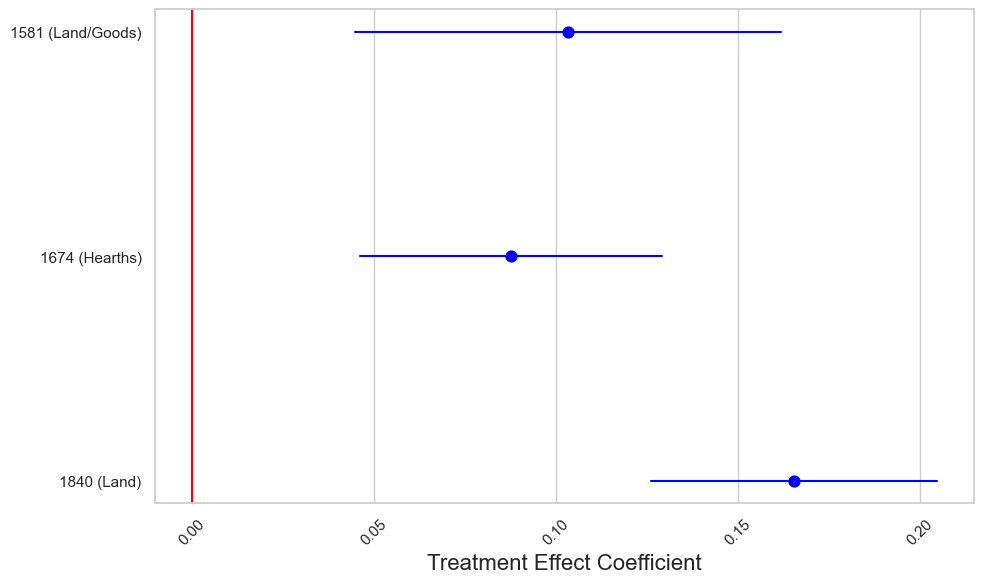

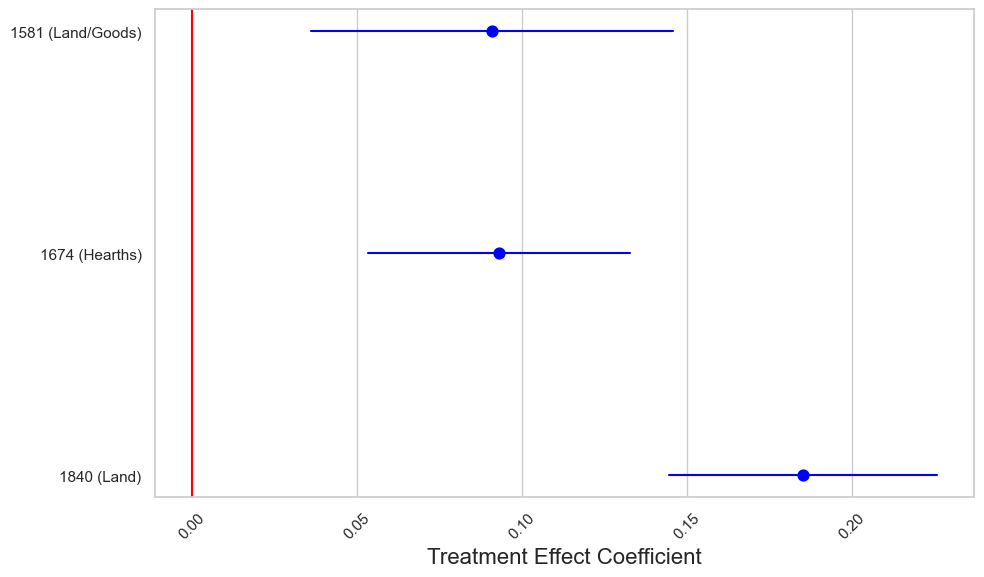

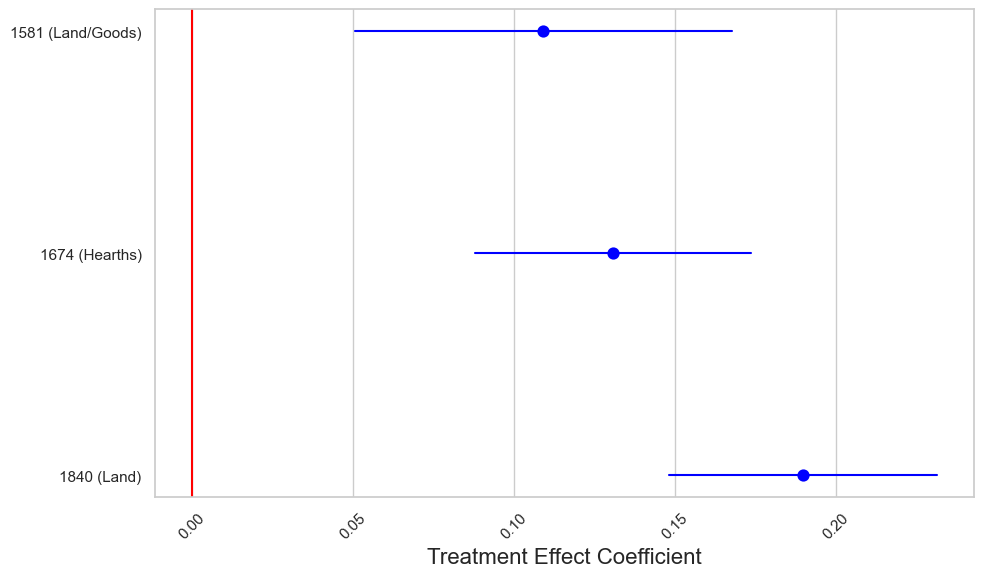

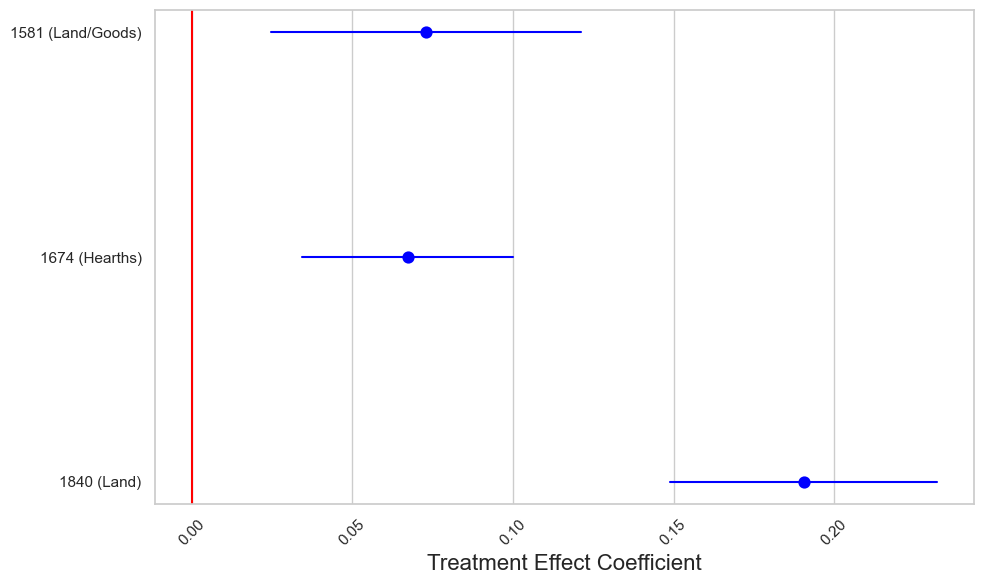

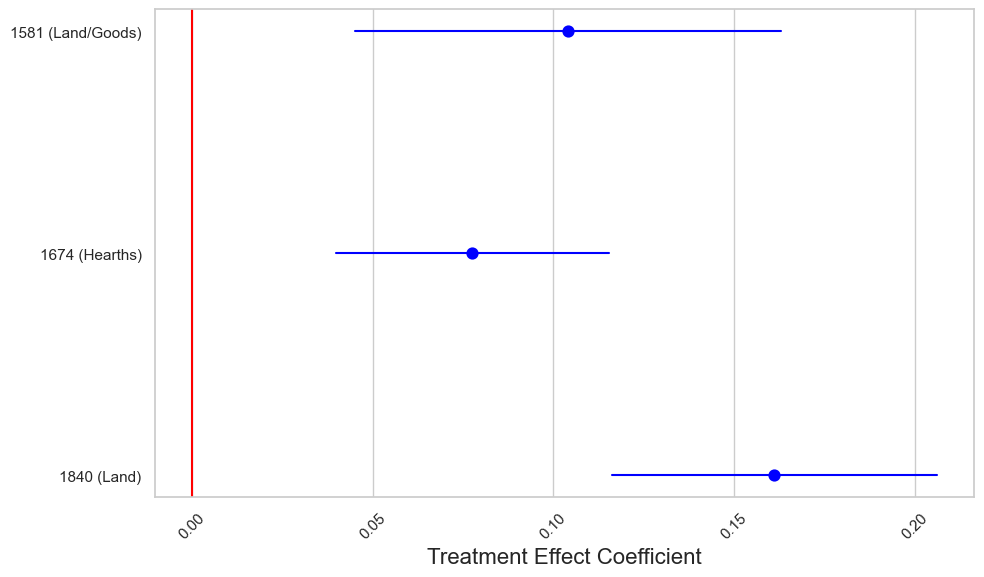

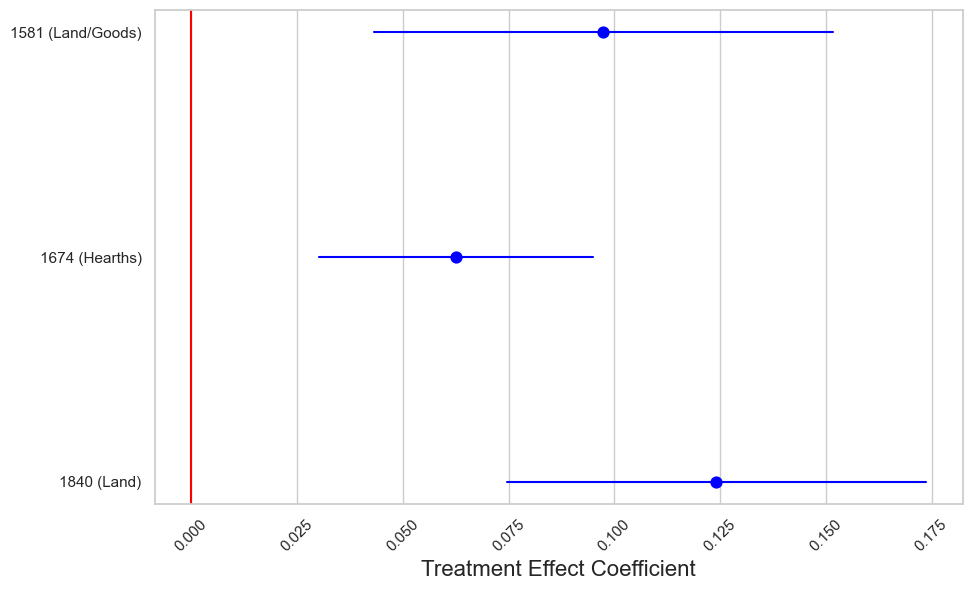

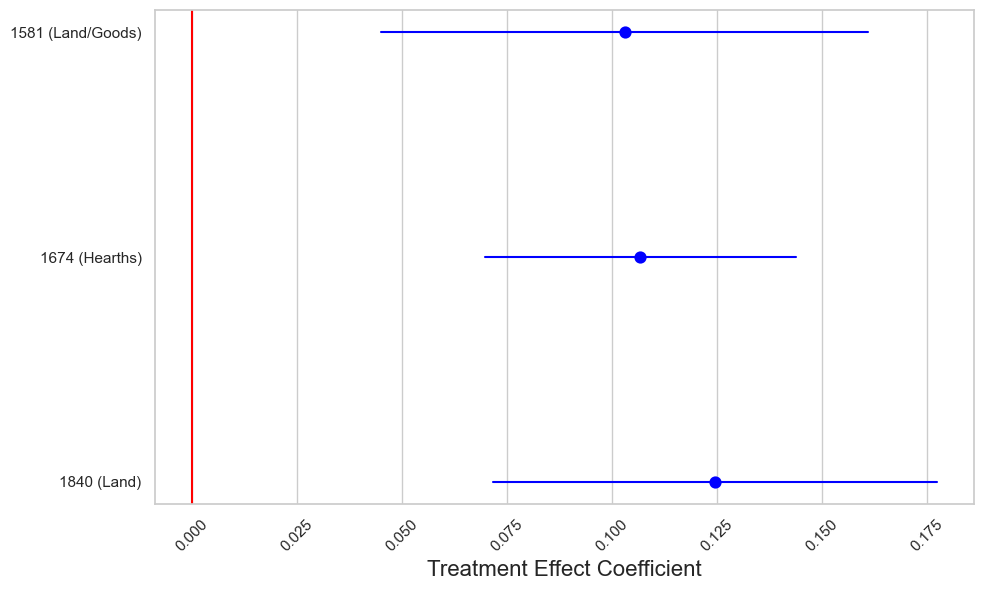

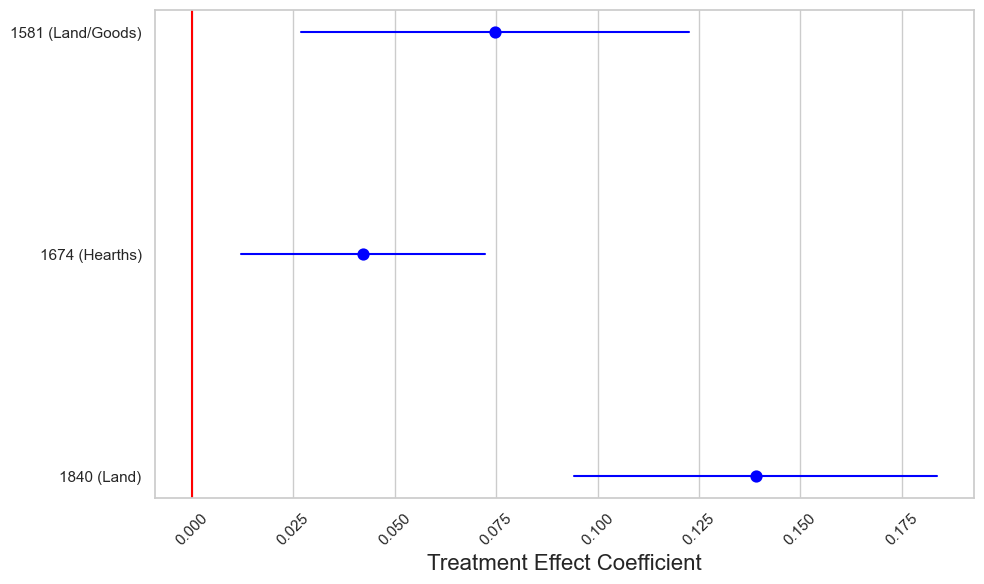

In [3]:
# Let's make some coef plots

with open(f'{PROCESSED}/pretty_dict.json', 'r') as f:
    pretty_dict = json.load(f)
for suffix in [
    '_1524_zeroes',
    ''
]:
    for measure in [
        'avg_val',
        'tot_val',
        'max_val',
        'count'
    ]:
        df = pd.read_csv(f'{TABLES}/{measure}_dr{suffix}.csv', index_col=0)
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'year'}, inplace=True)
        df['lower'] = df['Estimate'] - 1.96 * df['SE']
        df['upper'] = df['Estimate'] + 1.96 * df['SE']
        df['year'] = df['year'].astype(str)
        year_replace = {'1581': '1581 (Land/Goods)',
                        '1674': '1674 (Hearths)',
                        '1840': '1840 (Land)'}
        df['year'] = df['year'].replace(year_replace)
        plt.figure(figsize=(10, 6))
        sns.set_theme(style='whitegrid')
        sns.pointplot(data=df, x='Estimate', y='year', ci=None, markers='o', color='blue', linestyle=None, join=False)
        for i, row in df.iterrows():
            plt.plot([row['lower'], row['upper']], [row['year'], row['year']], color='blue')
        plt.xticks(rotation=45)
        plt.xlabel('Treatment Effect Coefficient', fontsize=16)
        plt.ylabel(None)
        plt.tight_layout()
        plt.axvline(x=0, color='red')
        plt.savefig(f'{IMAGES}/{measure}_dr{suffix}.png', dpi=300)

